<div class="alert alert-block alert-success">
    <h1 align="center">🚗CAR PRICE PREDICTION</h1>

</div>


    
### **100,000 UK Used Car Dataset**
**100,000 scraped used car listings, cleaned and split into car make.**
    
### Problem Statement
Predict the prices of the used cars using dataset.
    
### Content
The cleaned data set contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size.   
    


## TABLE OF CONTENT

* [1.Importing Libraries](#1)

* [2.Load the data](#2)
    
* [3.Meta information of dataframe](#3)
    
* [4.Duplicated rows.](#4)

* [5.Handling Missing Values.](#5)
    
* [6.Statistical information of Dataframe](#6) 

* [7.Categorical Features Into Numerical](#7)

* [8.Correlation](#8)

* [9.EDA & Visualization](#9)

* [10.Split training and testing](#10)

* [11.Modelling](#11)

* [12.Evaluation Metric](#12)

* [13.Feature Importance](#13)

<a id="1"></a>
## 1. Import Libaries
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools


%matplotlib inline 



<a id="2"></a>
## Load Data

### Data Description

* **Model:** Model type.
* **Year:** Registration Year.
* **Price:** Price in euros.
* **Transmission:** Type of Gearbos.
* **Mileage:** Distance Used.
* **FuelType:** Engine Fuel.
* **Tax:** Road Tax.
* **mpg:** Miles per Gallon.
* **EngineSize:** Size in litres.
* **Brand:** Name of the car brand.

In [2]:
# Different Car's dataset
audi = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/audi.csv")
bmw = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/bmw.csv")
ford = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/ford.csv")
hyundi = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/hyundi.csv")
merc = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/merc.csv")
skoda = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/skoda.csv")
toyota = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/toyota.csv")
vauxhall = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/vauxhall.csv")
vw = pd.read_csv("../input/used-car-dataset-ford-and-mercedes/vw.csv")

**We are having different datasets for different brands.So, importing all of them.**

In [3]:
audi['brand'] = 'audi'
bmw['brand'] = 'bmw'
ford['brand'] = 'ford'
hyundi['brand'] = 'hyundi'
merc['brand'] = 'merc'
skoda['brand'] = 'skoda'
toyota['brand'] = 'toyota'
vauxhall['brand'] = 'vauxhall'
vw['brand'] = 'vw'

**All datasets does not contain separate column for brand. So, we are creating a columns for brands**

In [4]:
df = pd.concat([audi,bmw,
               ford,hyundi,merc,skoda,toyota,
               vauxhall,vw])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN


**Concat all the different brands dataset into a single dataframe.**

In [5]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,tax(£)
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw,NaN
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw,NaN
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw,NaN
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw,NaN
15156,Fox,2007,2295,Manual,74000,Petrol,145.0,46.3,1.2,vw,NaN


In [6]:
# drop tax column
df.drop('tax(£)',axis=1,inplace=True)


**Droping the `tax(£)` column. Because we have already `tax` columns without any *null values***

In [7]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


**Dataframe with all datasets concated**

In [8]:
# shuffle the dataset
df = df.sample(frac=1)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
15047,Fiesta,2019,10700,Manual,10000,Petrol,150.0,55.4,1.1,ford
9937,Crossland X,2019,13498,Manual,4449,Petrol,145.0,47.1,1.2,vauxhall
11297,Galaxy,2016,16499,Manual,36209,Diesel,125.0,56.5,2.0,ford
1813,Yaris,2013,9299,Automatic,35916,Hybrid,0.0,80.7,1.5,toyota
7514,SQ7,2017,52888,Automatic,12000,Diesel,145.0,39.2,4.0,audi
...,...,...,...,...,...,...,...,...,...,...
2450,A3,2017,17691,Manual,17957,Petrol,30.0,60.1,1.4,audi
13839,Touareg,2017,24000,Automatic,19931,Diesel,240.0,42.8,3.0,vw
3572,Golf,2019,25980,Semi-Auto,4280,Petrol,145.0,37.7,2.0,vw
3751,Tucson,2019,26980,Semi-Auto,2984,Hybrid,NaN,50.4,1.6,hyundi


**The new dataframe with `brand` columns is lined one after one like `audi->bmw->......->vw`. But to pass this dataframe to our model for training it is not a good practise. So, to avoid that we are shuffle 10% of dataframe**

<a id="3"></a>
## Meta Information about DataFrame

In [9]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 15047 to 10759
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           94327 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   brand         99187 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


<a id="4"></a>
## Duplicated Rows

In [10]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 1483


In [11]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:",df.duplicated().sum())

After removing,now number of duplicated rows are: 0


<a id="5"></a>
## Handling Missing Values

<AxesSubplot:>

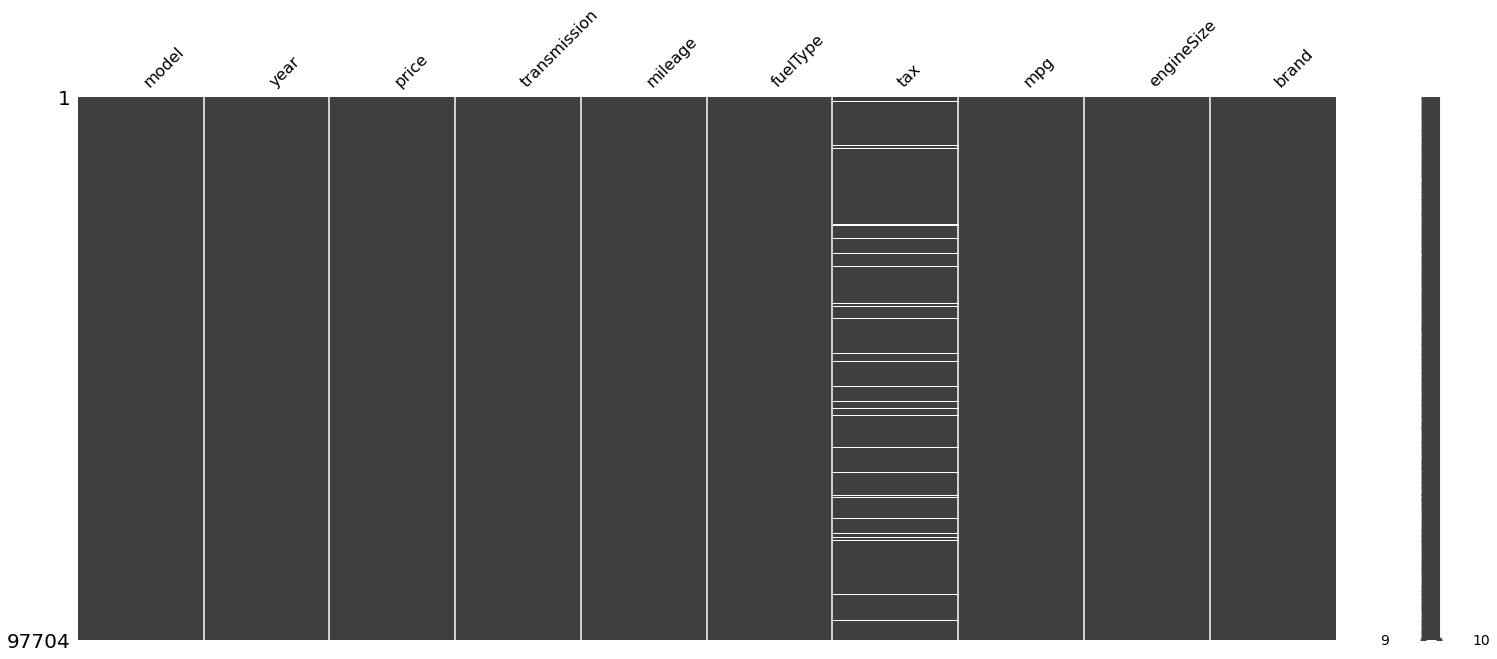

In [12]:
# Check any null values
missingno.matrix(df)

**Only `tax` column contains `null` values when compared with other columns**

In [13]:
df['tax'].fillna(df['tax'].mean(),inplace=True)


<AxesSubplot:>

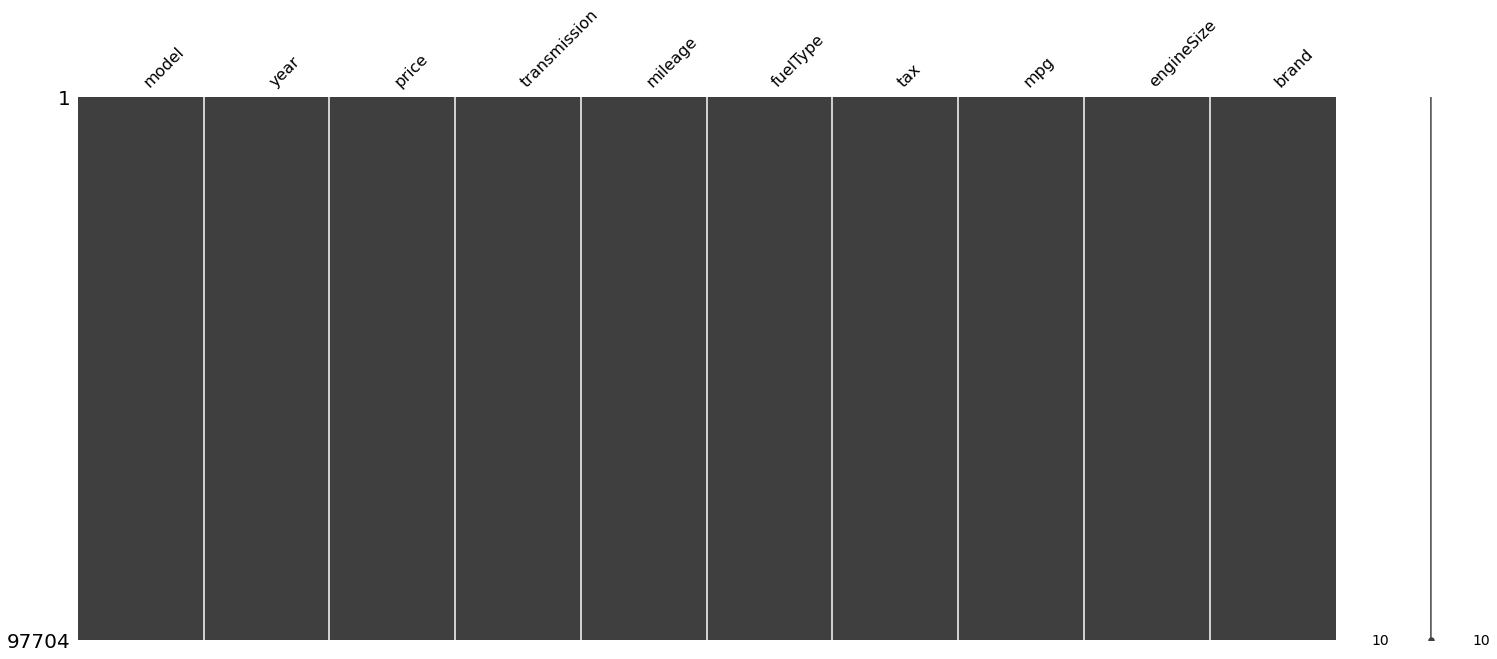

In [14]:
missingno.matrix(df)

**Now they are no null values**

<a id="6"></a>
## Statistical Information about DataFrame

In [15]:
# describe
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(
subset=['std'],cmap='mako').background_gradient(subset=['50%'],cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
year,97704.000000,2017.066783,2.123046,1970.000000,2016.000000,2017.000000,2019.000000,2060.000000
price,97704.000000,16773.614867,9868.697321,450.000000,9999.000000,14470.500000,20750.000000,159999.000000
mileage,97704.000000,23220.188958,21061.341896,1.000000,7673.000000,17684.500000,32500.000000,323000.000000
tax,97704.000000,120.088715,62.042780,0.000000,120.088715,145.000000,145.000000,580.000000
mpg,97704.000000,55.205783,16.182052,0.300000,47.100000,54.300000,62.800000,470.800000
engineSize,97704.000000,1.664929,0.558581,0.000000,1.200000,1.600000,2.000000,6.600000


<a id="7"></a>
## Categorical Features Into Numerical Features

In [16]:
df_1 =df.copy()
df_1

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
15047,Fiesta,2019,10700,Manual,10000,Petrol,150.000000,55.4,1.1,ford
9937,Crossland X,2019,13498,Manual,4449,Petrol,145.000000,47.1,1.2,vauxhall
11297,Galaxy,2016,16499,Manual,36209,Diesel,125.000000,56.5,2.0,ford
1813,Yaris,2013,9299,Automatic,35916,Hybrid,0.000000,80.7,1.5,toyota
7514,SQ7,2017,52888,Automatic,12000,Diesel,145.000000,39.2,4.0,audi
...,...,...,...,...,...,...,...,...,...,...
2450,A3,2017,17691,Manual,17957,Petrol,30.000000,60.1,1.4,audi
13839,Touareg,2017,24000,Automatic,19931,Diesel,240.000000,42.8,3.0,vw
3572,Golf,2019,25980,Semi-Auto,4280,Petrol,145.000000,37.7,2.0,vw
3751,Tucson,2019,26980,Semi-Auto,2984,Hybrid,120.088715,50.4,1.6,hyundi


In [17]:
def preprocess_data(df):
    
    """
    Performs transformation on df and returns transformed df.
    
    """
    for label,content in df.items():
   
        #Filled categoricnaL missing data and turned categories into numbers 
        if not pd.api.types.is_numeric_dtype(content):
         # We add +1 to the category code because pandas encodes missing categories as -1
           df[label] = pd.Categorical(content).codes+1
    
    return df

In [18]:
df_transformed = preprocess_data(df_1)
df_transformed.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
15047,61,2019,10700,2,10000,5,150.0,55.4,1.1,3
9937,54,2019,13498,2,4449,5,145.0,47.1,1.2,8
11297,74,2016,16499,2,36209,1,125.0,56.5,2.0,3
1813,183,2013,9299,1,35916,3,0.0,80.7,1.5,7
7514,144,2017,52888,1,12000,1,145.0,39.2,4.0,1


**Turning Categorical values into Numerical values**

<a id="8"></a>
## Correlation

In [19]:
# Check the correlation between target and each of columns
df.corr()['price']

year          0.491322
price         1.000000
mileage      -0.418016
tax           0.305055
mpg          -0.295494
engineSize    0.639351
Name: price, dtype: float64

<AxesSubplot:>

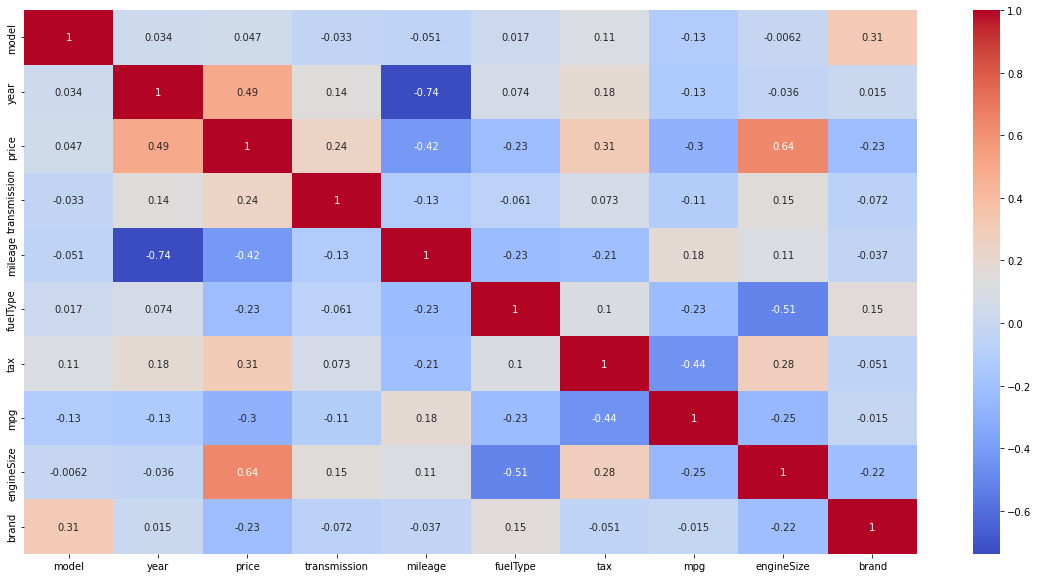

In [20]:
plt.figure(figsize=(20,10))

# plot heatmap
sns.heatmap(df_transformed.corr(), annot=True,cmap='coolwarm', linecolor='black')

**The columns `year`,`transmission`,`tax`,`engineSize` are having more *correlation* with *price***

<a id="9"></a>
## EDA & Visualization

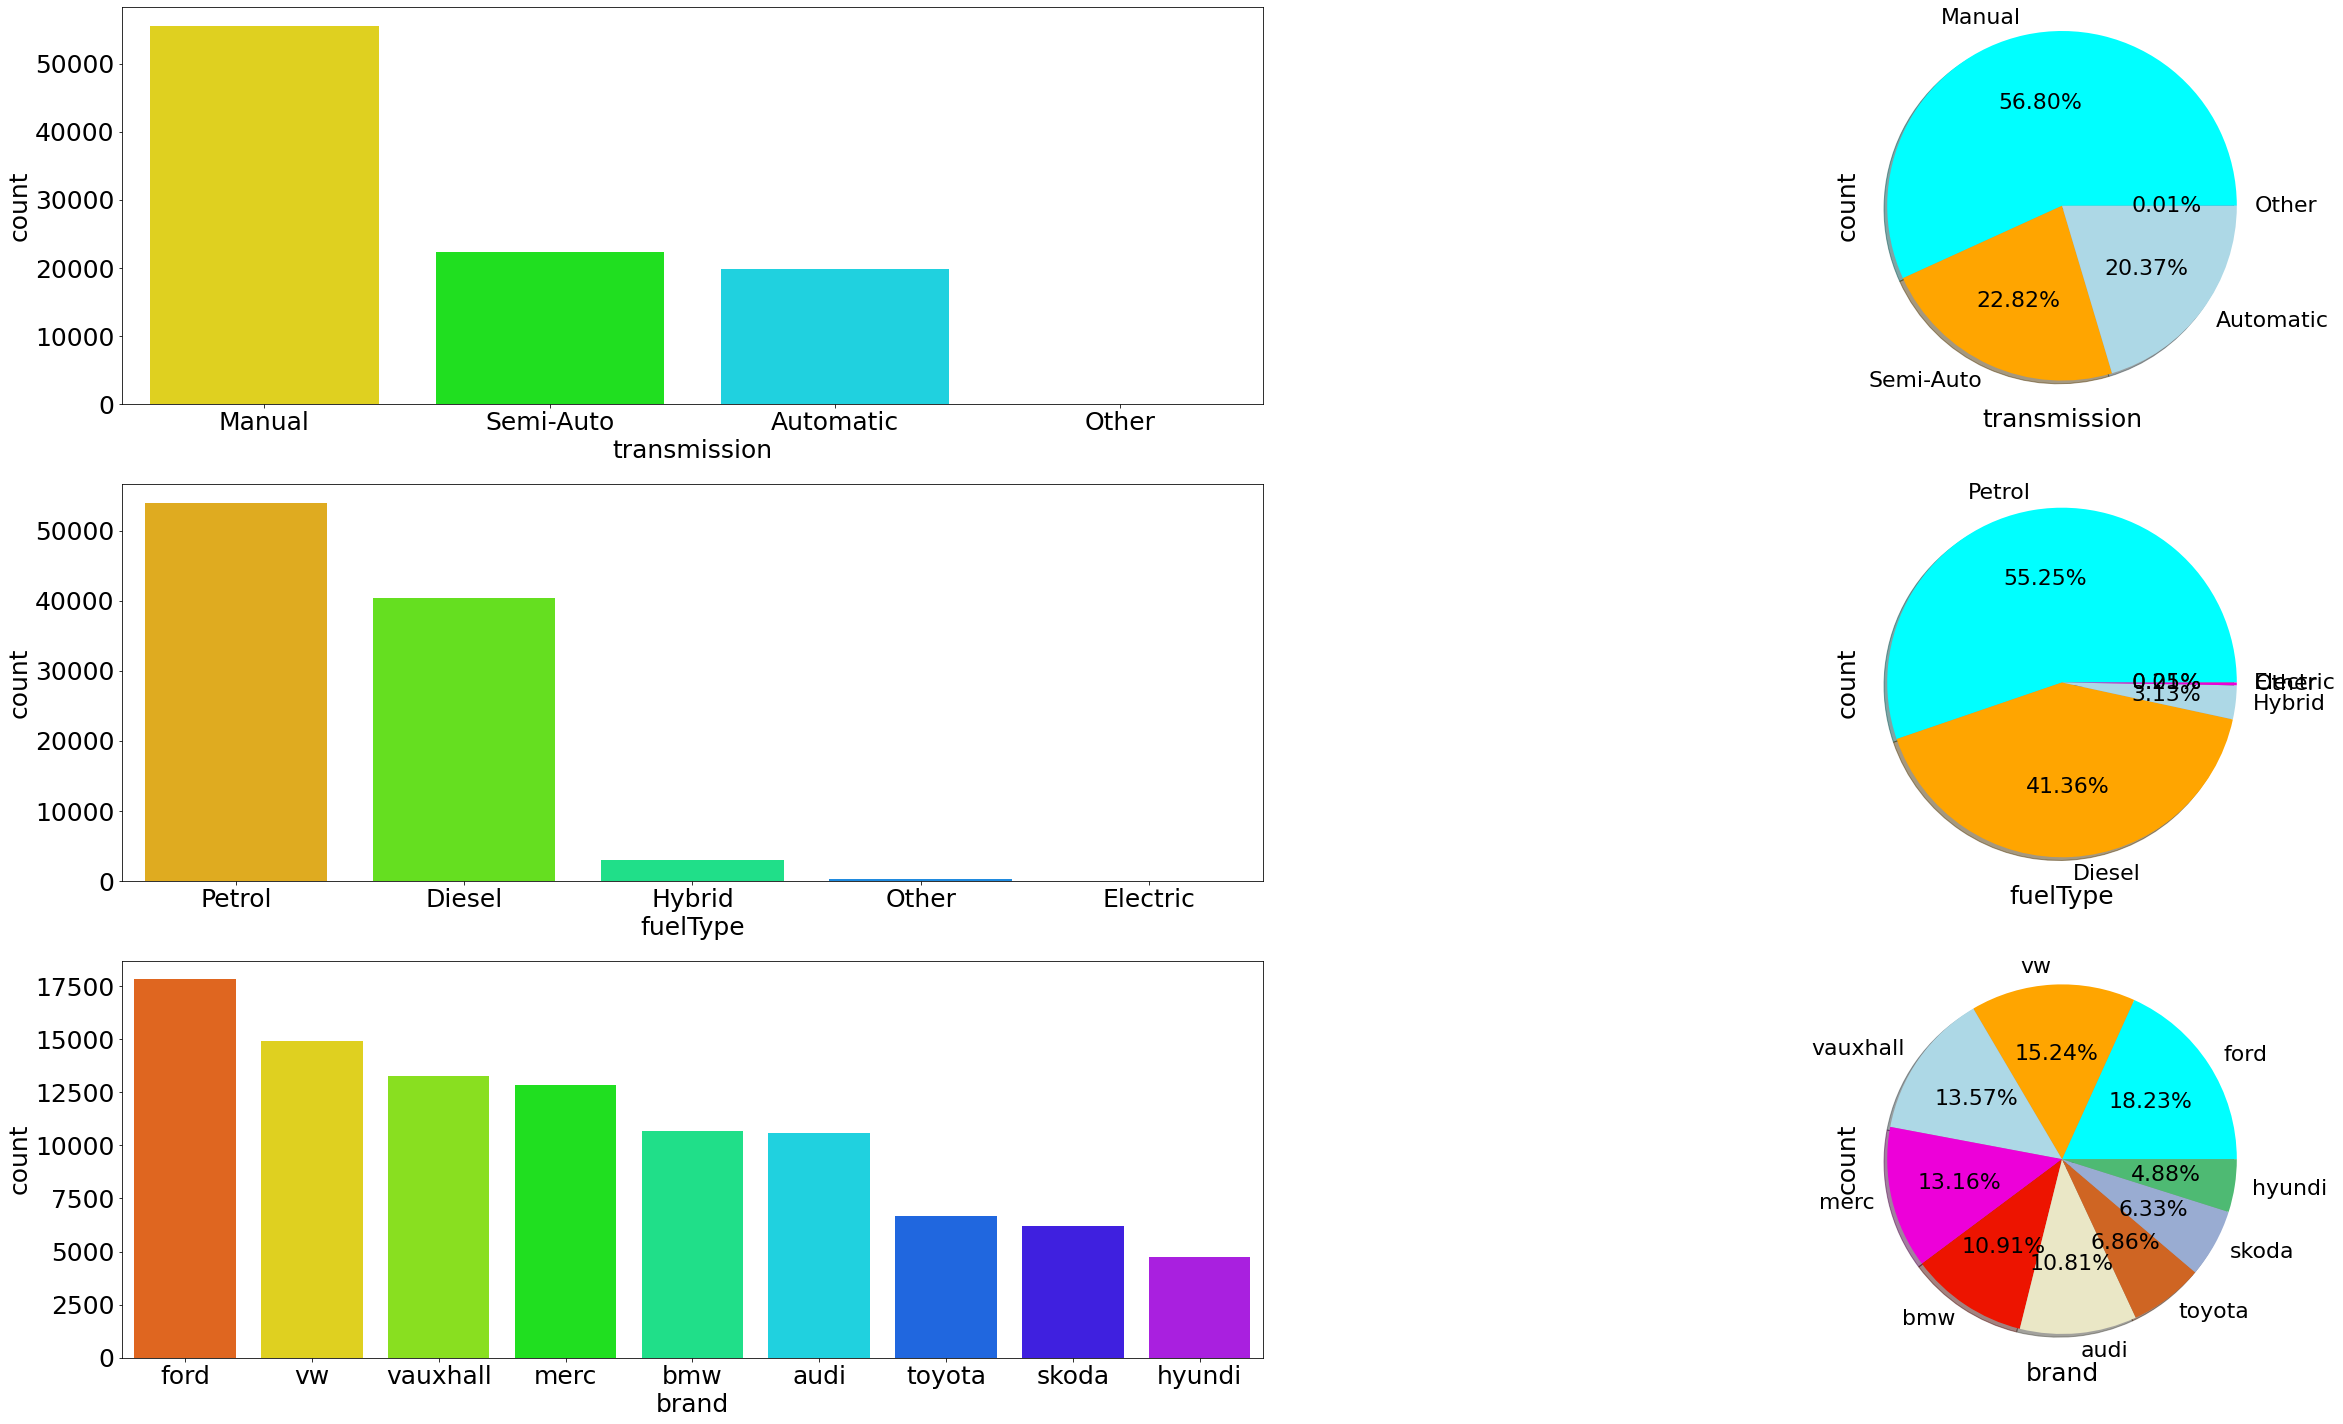

In [21]:
plot_columns=[ 'transmission','fuelType','brand']
colors = ["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400","#EAE7C6","#CF6523","#99ACD2","#4EBA73","#DDA8D7"]
textprops = {"fontsize":22}
i=1
plt.figure(figsize=(45,95))
for col in plot_columns:
    plt.subplot(11,2,i)
    sns.countplot(data=df,x=col,palette='gist_rainbow',order=df[col].value_counts().index)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    df[col].value_counts().plot(kind='pie',autopct='%.2f%%',
                               colors=colors,textprops=textprops,shadow=True,radius=1.1)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel('count',fontsize=25)
    i=i+1
    
plt.show()

**1) First Figure has value counts for `transmission` columns with `Manual`,`Semi-Auto`,`Automatic`,`other`. Here `Manual` transmission has more value counts when compared with other transmission.**

**2) Second Figure has value counts for `fuelType` columns with `Petrol`,`Diesel`,`Hybrid`,`other`,`Electric`. Here `Petrol` fuelType has more value counts when compared with other fuelType.**

**3) Third Figure has value counts for `brand` columns with all different brands. Here `ford` brand has more value counts when compared with other brands**

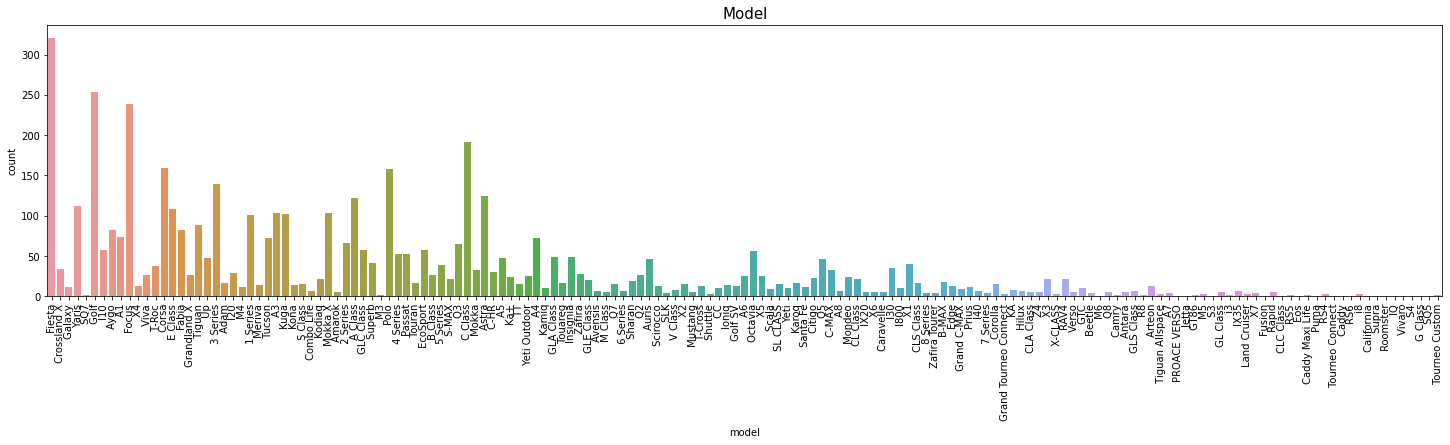

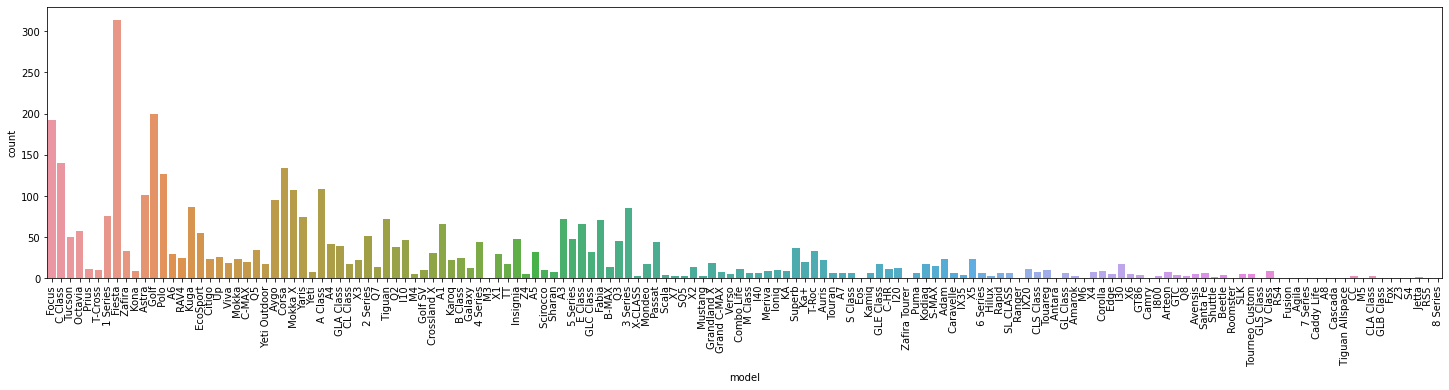

In [22]:
# model
plt.figure(figsize=(25,5))
sns.countplot(x='model',data=df[:5000])
plt.title("Model",fontsize=15)
plt.xticks(rotation=90)
plt.show();

plt.figure(figsize=(25,5))
sns.countplot(x='model',data=df[5000:9000])
plt.xticks(rotation=90)
plt.show();


**Value counts for `model` columns upto 9000 records**

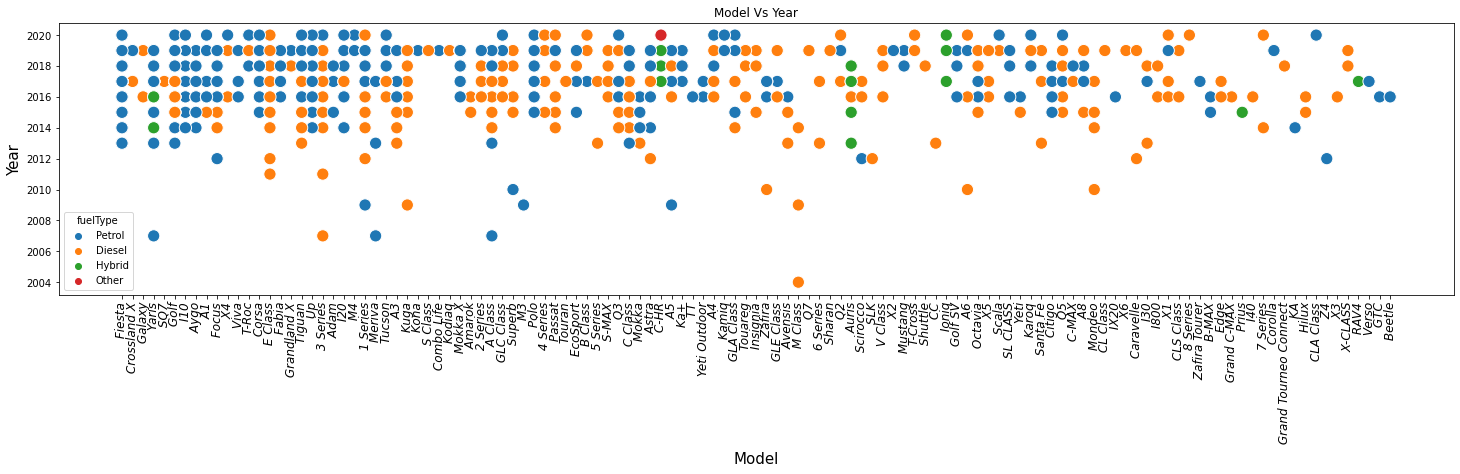

In [23]:
# Plot scatterplot between price and  year
plt.figure(figsize=(25,5))
sns.scatterplot(x='model',y='year',data=df[:1000],hue='fuelType',s=150)
plt.title("Model Vs Year")
plt.xlabel("Model",fontsize=15)
plt.ylabel("Year",fontsize=15)
plt.xticks(rotation=90,fontsize=12,fontstyle='oblique')
plt.show();

**This plot shows relation between `model` and `year` with `fuelType`**.
**Here we can see that most of the models from year 2006-2020 having `Diesel` and `Petrol` fueltype.**

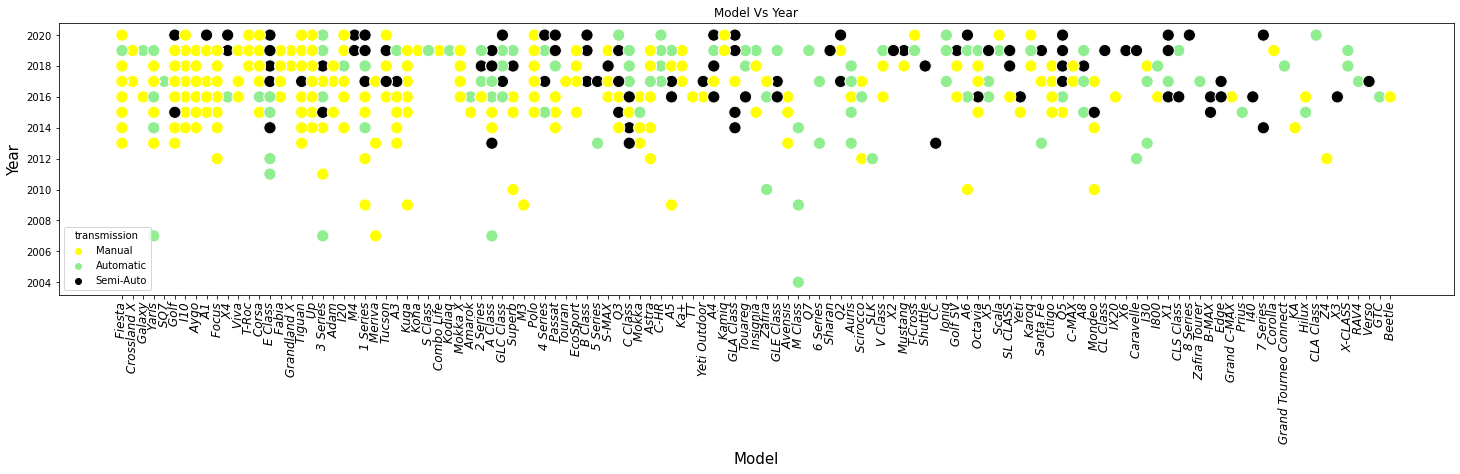

In [24]:
# Plot scatterplot between price and  year
plt.figure(figsize=(25,5))
sns.scatterplot(x='model',y='year',data=df[:1000],hue='transmission',s=150,palette=['yellow','lightgreen','black'],legend='full')
plt.title("Model Vs Year")
plt.xlabel("Model",fontsize=15)
plt.ylabel("Year",fontsize=15)
plt.xticks(rotation=90,fontsize=12,fontstyle='oblique')
plt.show();

**This plot shows relation between `model` and `year` with `transmission`**.
**Here we can see that most of the models from year 2006-2020 having `Manual` transmission.**

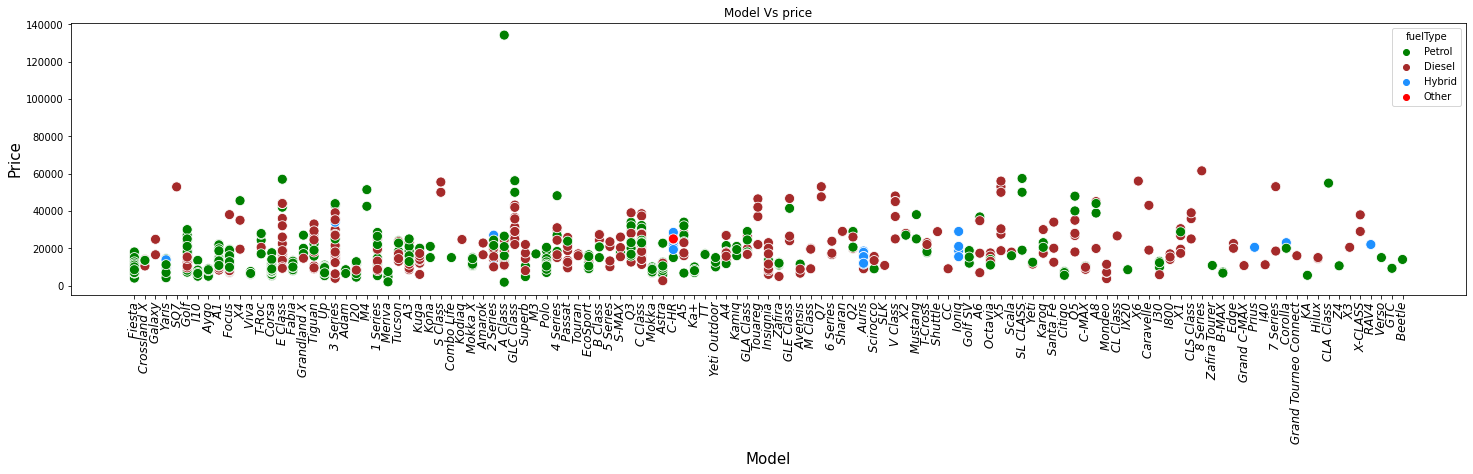

In [25]:
# Plot scatterplot between price and  year
plt.figure(figsize=(25,5))
sns.scatterplot(x='model',y='price',data=df[:1000],hue='fuelType',s=100,palette=['green','brown','dodgerblue','red'],legend='full')
plt.title("Model Vs price")
plt.xlabel("Model",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.xticks(rotation=90,fontsize=12,fontstyle='oblique')
plt.show();

**Most of the `models` having high price with `Diesel` fuelType and the second highest is `Petrol`**

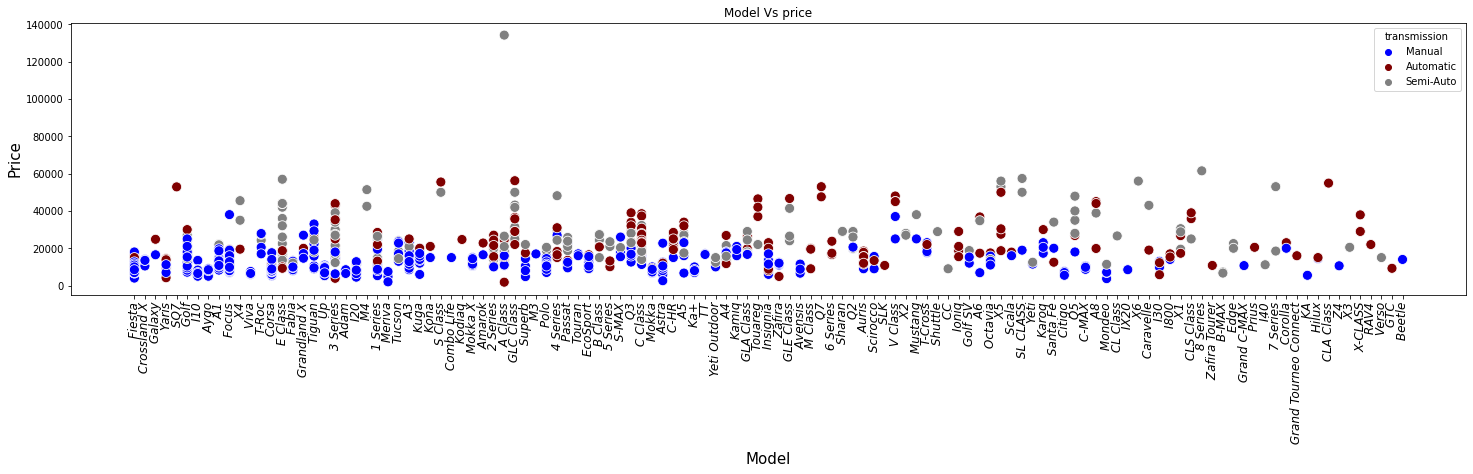

In [26]:
# Plot scatterplot between price and  year
plt.figure(figsize=(25,5))
sns.scatterplot(x='model',y='price',data=df[:1000],hue='transmission',s=100,palette=['blue','maroon','grey'],legend='full')
plt.title("Model Vs price")
plt.ylabel("Price",fontsize=15)
plt.xlabel("Model",fontsize=15)
plt.xticks(rotation=90,fontsize=12,fontstyle='oblique')
plt.show();

**Most of the `models` having high price with `Manual` transmission and the second highest is `Automatic`**

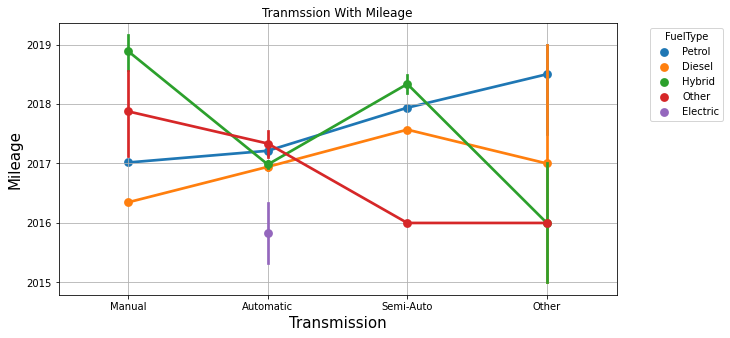

In [27]:
plt.figure(figsize=(10,5))
sns.pointplot(x='transmission',y='year',data=df,hue='fuelType')
plt.title("Tranmssion With Mileage")
plt.xlabel('Transmission',fontsize=15)
plt.ylabel('Mileage',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='FuelType')
plt.grid(True)
plt.show();

**This is a `pairplot` showing relationship between `transmission` and `year`. Clearly, we observe that `Electric` fuelType is mostly used in `Automatic` transmission.The `Diesel` fuelType is in popular and in demand in all transmission till 2017. Then after that the demand for `petrol` has is risen up when compared with `diesel`.**

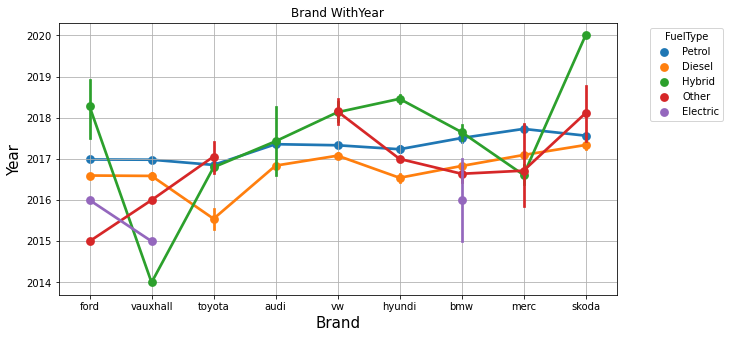

In [28]:
plt.figure(figsize=(10,5))
sns.pointplot(x='brand',y='year',data=df,hue='fuelType')
plt.title("Brand WithYear")
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Year',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='FuelType')
plt.grid(True)
plt.show();

**The `Electric` fueltype is only used by `bmw` and `vauxhall`.The `Hybrid` fueltype is fluctuating across all brands. `Hybrid` fueltype is mostly used by `skoda` in 2020. The `petrol` and `diesel` fueltypes are commonly in all brands.**

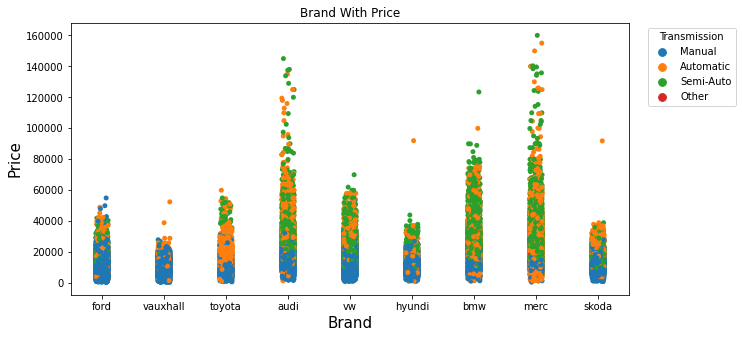

In [29]:
plt.figure(figsize=(10,5))
sns.stripplot(x='brand',y='price',data=df,hue='transmission')
plt.title("Brand With Price")
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='Transmission')
plt.show();

**Most of the brands with `semi-auto` transmission having more price across all brands,`bmw` and `mercedes` have more `semi-auto` transmission.The demand for `automatic` transmission is seen in `toyota` brand.The `Manual` transmission is common in all brands, but `mercedes`, `toyota` and `bmw` has less `Manual` transmission. `**

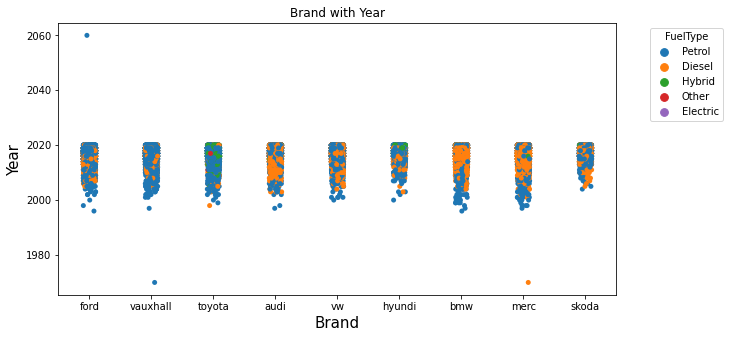

In [30]:
plt.figure(figsize=(10,5))
sns.stripplot(x='brand',y='year',data=df,hue='fuelType')
plt.title("Brand with Year")
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Year',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='FuelType')
plt.show();

**The most of the brands with different fueltypes are seen in year between 2000-2020. All brands having `Diesel` and `Petrol` fueltype.**

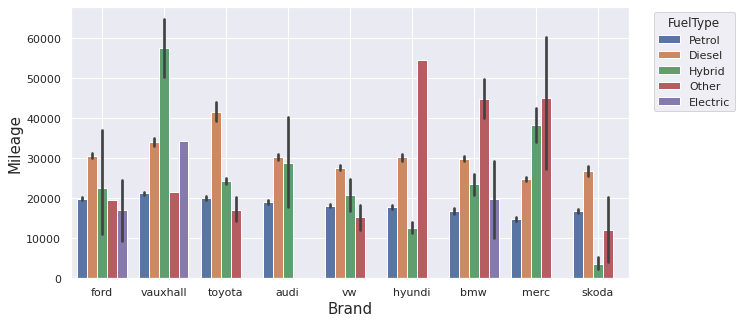

In [31]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='mileage',data=df,hue='fuelType')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Mileage',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='FuelType')
plt.grid(True)
plt.show();

**When it comes to `mileage` the brand which has `Hybrid` has more in demand except `hyundi`, `skoda`. The second and third best fueltype for mileage are `Diesel` and `Petrol` respectively, it is popular and mostly used in all brands.**

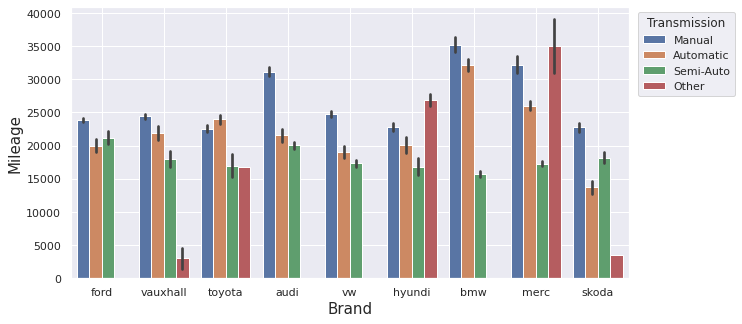

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='mileage',data=df,hue='transmission')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Mileage',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='Transmission')
plt.grid(True)
plt.show();

**The `Manual` and `Automatic` transmission are common and mostly used in all brands with respect to `mileage`.**

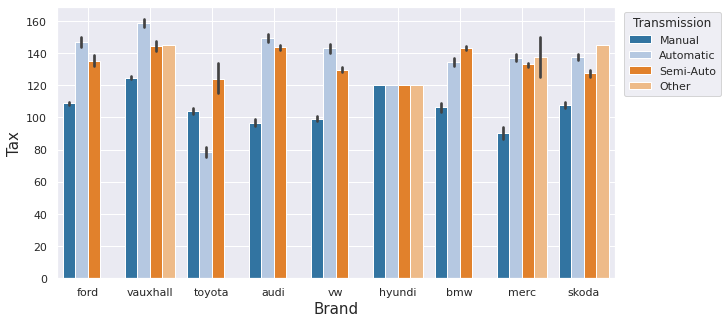

In [33]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='tax',data=df,hue='transmission',palette='tab20')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Tax',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='Transmission')
plt.grid(True)
plt.show();

**Brand with `Automatic` transmission pays more `tax` and `Manual` transmission has low paying `tax` capability.**

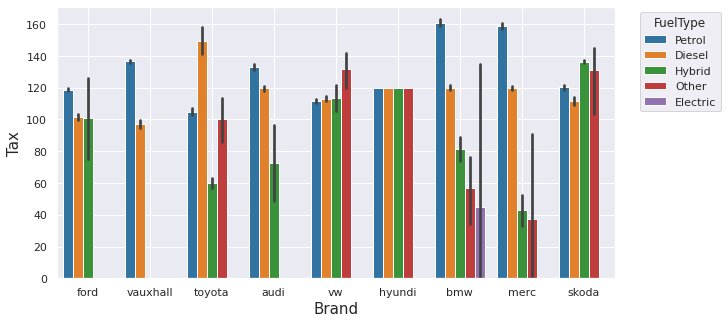

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x='brand',y='tax',data=df,hue='fuelType',palette='tab10')
plt.xlabel('Brand',fontsize=15)
plt.ylabel('Tax',fontsize=15)
plt.legend(bbox_to_anchor=(1.2,1.0),title='FuelType')
plt.grid(True)
plt.show();

**Brand With `Petrol` fueltype pays more tax and the second most payed tax is by `Diesel` fueltype.**

<Figure size 1080x360 with 0 Axes>

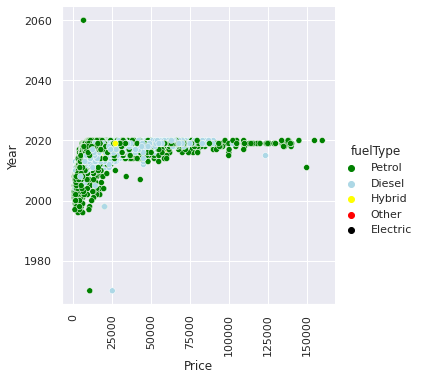

In [35]:
plt.figure(figsize=(15,5))
sns.relplot(x='price',y='year',data=df,hue='fuelType',palette=['green','lightblue','yellow','red','black'])
plt.xlabel("Price")
plt.ylabel("Year")
plt.xticks(rotation=90)
plt.grid(True)
plt.show();

<a id="10"></a>
## Split Dataset into Training and Testing

In [36]:
X = df_transformed.drop('price',axis=1)
y = df_transformed['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

len(X_train),len(X_test),len(y_train),len(y_test)

(68392, 29312, 68392, 29312)

<a id="11"></a>
## Modelling

In [37]:
# Create model and train
def models_score(models,X_train,X_test,y_train,y_test):
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        scores[name] = r2_score(y_test,y_pred)
        
        # printing the model name and accuracy
        print("Model name: ",model)
        print("R2 score : ",r2_score(y_test,y_pred))
        print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
        print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

        print("\n<<<<------------------------------------------------------------->>>>\n")
        
    model_scores = pd.DataFrame(scores, index=['R2 Score']).T
    model_scores = model_scores.sort_values('R2 Score',ascending=False)
    return model_scores
        

In [38]:
# Initialize the models
np.random.seed(42)
models = {"LinearRegression":LinearRegression(),
          "GradiantBoost":GradientBoostingRegressor(),
         "RandomForest":RandomForestRegressor(),
         "XgBoost": XGBRegressor(verbose=0),
         "DecisionTreeRegressor":DecisionTreeRegressor(),
         "CatBoost":CatBoostRegressor(verbose=0),
         "LightGBM":LGBMRegressor()}

In [39]:
model_scores = models_score(models,X_train,X_test,y_train,y_test)
model_scores

Model name:  LinearRegression()
R2 score :  0.7245872446645667
Mean Absolute Error :  3460.9782571330347
Mean Squared Error :  27011737.23659509

<<<<------------------------------------------------------------->>>>

Model name:  GradientBoostingRegressor()
R2 score :  0.9035947769353936
Mean Absolute Error :  2014.181447194261
Mean Squared Error :  9455163.216696009

<<<<------------------------------------------------------------->>>>

Model name:  RandomForestRegressor()
R2 score :  0.9570150751374162
Mean Absolute Error :  1178.1270143400607
Mean Squared Error :  4215845.029068326

<<<<------------------------------------------------------------->>>>

[08:18:07] WARNING: ../src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model n

,R2 Score
XgBoost,0.958061
CatBoost,0.957750
RandomForest,0.957015
LightGBM,0.947076
DecisionTreeRegressor,0.928184
GradiantBoost,0.903595
LinearRegression,0.724587


<a id="12"></a>
## Evaluation Metric

In [40]:
model_scores = model_scores.reset_index().rename({"index":"Models"},axis=1)
model_scores.style.bar()

,Models,R2 Score
0,XgBoost,0.958061
1,CatBoost,0.957750
2,RandomForest,0.957015
3,LightGBM,0.947076
4,DecisionTreeRegressor,0.928184
5,GradiantBoost,0.903595
6,LinearRegression,0.724587


In [41]:
fig = px.bar(data_frame = model_scores,
             x="Models",
             y="R2 Score",
             color="Models", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.2)

fig.show()

In [42]:
label = model_scores['Models']
value = model_scores['R2 Score']


fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15,template='plotly_dark')


fig.show()

### Predicting on unseen data with our best performing model

In [43]:

model = CatBoostRegressor(verbose=0)
model.fit(X_train,y_train)


 **model = 70, 
 year = 2006,
 transmission.automatic = 4,
 fuelType.petrol = 1,
 tax = 305.0,
 mpg = 58.0,
 enginesize = 4.4,
 brand.bmw = 1**

In [44]:
features = [70,2006,4,16356,1,305.0,58.0,4.4,1]
y_pred = model.predict(features)
print(f"Price in euros : {y_pred}")

Price in euros : 16027.665166123476


<a id="13"></a>
## Feature Importance

In [45]:
# Print the name and gini importance of each features 
for feature in zip(df.columns,model.feature_importances_):
    print(feature)

('model', 11.972166081587915)
('year', 20.98085624735349)
('price', 5.420633947332772)
('transmission', 6.528845586044361)
('mileage', 1.4315803969973067)
('fuelType', 0.8665082634360185)
('tax', 8.79159527403302)
('mpg', 35.00488659856976)
('engineSize', 9.002927604645372)


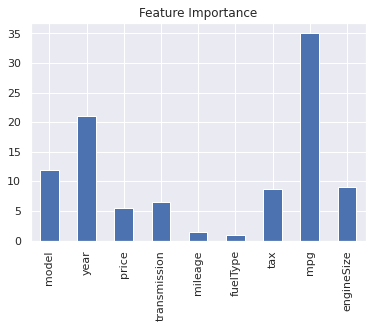

In [46]:
# # visualize feature importance
feature_dict = dict(zip(df.columns,list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

## End🔚